In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Setting to make numbers easier to read on display
pd.options.display.float_format = '{:20.2f}'.format

# Show all columns on output
pd.set_option('display.max_columns', 999)

## Data Exploration

In [2]:
# Load Dataset
data_path = "/home/fox/Desktop/Online-Retail-II-Clustering/data/online_retail_II.xlsx"
df = pd.read_excel(data_path, sheet_name=0)
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.00,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.00,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.00,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.00,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [4]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.00,525461,525461.00,417534.00
mean,10.34,2010-06-28 11:37:36.845017856,4.69,15360.65
min,-9600.00,2009-12-01 07:45:00,-53594.36,12346.00
25%,1.00,2010-03-21 12:20:00,1.25,13983.00
50%,3.00,2010-07-06 09:51:00,2.10,15311.00
75%,10.00,2010-10-15 12:45:00,4.21,16799.00
max,19152.00,2010-12-09 20:01:00,25111.09,18287.00
std,107.42,NaN,146.13,1680.81


In [5]:
df.describe(include='O')

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [6]:
# Display the first 10 rows where "Customer ID" is NaN
df[df["Customer ID"].isna()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom


In [7]:
# Display the first 10 rows where "Quantity" is negative
df[df["Quantity"] < 0].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.00,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.00,United Kingdom


In [8]:
# Convert "Invoice" column to string type
df["Invoice"] = df["Invoice"].astype("str")

# Filter rows where "Invoice" does not match exactly six digits
df[df["Invoice"].str.match("^\\d{6}$") == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.00,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.00,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.00,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.00,United Kingdom


In [9]:
# Remove numeric characters and get unique values
df["Invoice"].str.replace("[0-9]", "", regex=True).unique()

array(['', 'C', 'A'], dtype=object)

In [10]:
# Filter rows where 'Invoice' starts with 'A'
df[df["Invoice"].str.startswith("A")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


In [11]:
# Ensure the 'StockCode' column is of type string
df["StockCode"] = df["StockCode"].astype("str")

# Filter the DataFrame to include only those rows where the 'StockCode' does not match either of the two patterns
# Pattern 1: Exactly 5 digits (e.g., '12345')
# Pattern 2: Exactly 5 digits followed by one or more letters (e.g., '12345A')
df[
    (df["StockCode"].str.match("^\\d{5}$") == False) & 
    (df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == False)
]["StockCode"].unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

In [12]:
# Filter rows where 'StockCode' starts with 'DOT'
df[df["StockCode"].str.contains("^DOT")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2379,489597,DOT,DOTCOM POSTAGE,1,2009-12-01 14:28:00,647.19,NaN,United Kingdom
2539,489600,DOT,DOTCOM POSTAGE,1,2009-12-01 14:43:00,55.96,NaN,United Kingdom
2551,489601,DOT,DOTCOM POSTAGE,1,2009-12-01 14:44:00,68.39,NaN,United Kingdom
2571,489602,DOT,DOTCOM POSTAGE,1,2009-12-01 14:45:00,59.35,NaN,United Kingdom
2619,489603,DOT,DOTCOM POSTAGE,1,2009-12-01 14:46:00,42.39,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
524272,538071,DOT,DOTCOM POSTAGE,1,2010-12-09 14:09:00,885.94,NaN,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.32,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.68,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.94,NaN,United Kingdom


In [13]:
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.00,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.00,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.00,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.00,United Kingdom


### Notes

#### Stock Code
* StockCode is meant to follow the pattern `[0-9]{5}` but seems to have legit values for `[0-9]{5}[a-zA-Z]+`
    * Also contains other values:
        | **Code**            | **Description**                                                        | **Action**              |
        |---------------------|------------------------------------------------------------------------|-------------------------|
        | DCGS            | Looks valid, some quantities are negative though and customer ID is null | Exclude from clustering |
        | D               | Looks valid, represents discount values                                | Exclude from clustering |
        | DOT             | Looks valid, represents postage charges                                | Exclude from clustering |
        | M or m          | Looks valid, represents manual transactions                            | Exclude from clustering |
        | C2              | Carriage transaction - not sure what this means                        | Exclude from clustering |
        | C3              | Not sure, only 1 transaction                                           | Exclude                 |
        | BANK CHARGES or B | Bank charges                                                        | Exclude from clustering |
        | S               | Samples sent to customer                                               | Exclude from clustering |
        | TESTXXX         | Testing data, not valid                                                | Exclude from clustering |
        | gift__XXX       | Purchases with gift cards, might be interesting for another analysis, but no customer data | Exclude |
        | PADS            | Looks like a legit stock code for padding                              | Include                 |
        | SP1002          | Looks like a special request item, only 2 transactions, 3 look legit, 1 has 0 pricing | Exclude for now|
        | AMAZONFEE       | Looks like fees for Amazon shipping or something                       | Exclude for now         |
        | ADJUSTX         | Looks like manual account adjustments by admins                        | Exclude for now         |

## Data Cleaning

In [14]:
cleaned_df = df.copy()

In [15]:
# Ensure the "Invoice" column is treated as strings
cleaned_df["StockCode"] = cleaned_df["StockCode"].astype("str")

# Create a boolean mask where each entry is True if the "Invoice" value matches exactly six digits
mask = (
    (cleaned_df["StockCode"].str.match("^\\d{5}$") == True)
    | (cleaned_df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == True)
    | (cleaned_df["StockCode"].str.match("^PADS$") == True)
)

# Filter the DataFrame to only include rows where the "Invoice" column matches the mask
cleaned_df = cleaned_df[mask]

cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [16]:
cleaned_df.dropna(subset=["Customer ID"], inplace=True)

In [17]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,415732.00,415732,415732.00,415732.00
mean,12.81,2010-07-01 01:38:55.922276864,3.03,15366.23
min,-9360.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-26 11:56:00,1.25,13995.00
50%,5.00,2010-07-08 19:56:00,1.95,15311.00
75%,12.00,2010-10-14 14:14:00,3.75,16805.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00
std,101.43,NaN,4.47,1678.37


In [18]:
len(cleaned_df[cleaned_df["Price"] == 0])

28

In [19]:
# Filter out rows where the "Price" column is zero
cleaned_df = cleaned_df[cleaned_df["Price"] > 0.0]

In [20]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,415704.00,415704,415704.00,415704.00
mean,12.81,2010-07-01 01:42:08.673863936,3.03,15366.32
min,-9360.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-26 11:56:00,1.25,13995.00
50%,5.00,2010-07-08 19:56:00,1.95,15311.00
75%,12.00,2010-10-14 14:14:00,3.75,16805.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00
std,101.43,NaN,4.47,1678.34


In [21]:
cleaned_df["Price"].min()

0.001

In [22]:
# Calculate the proportion of rows in the cleaned DataFrame compared to the original DataFrame
len(cleaned_df)/len(df)

0.7911224619905188

Dropped about 23% of records during cleaning

## Feature Engineering

In [23]:
# Create a new column 'SalesLineTotal' by multiplying 'Quantity' and 'Price' columns
cleaned_df["SalesLineTotal"] = cleaned_df["Quantity"] * cleaned_df["Price"]

cleaned_df

/tmp/ipykernel_37841/2764257808.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["SalesLineTotal"] = cleaned_df["Quantity"] * cleaned_df["Price"]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesLineTotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,7.50


In [24]:
# Group the cleaned DataFrame by 'Customer ID'
aggregated_df = cleaned_df.groupby(by="Customer ID", as_index=False) \
    .agg(
        # Calculate the total monetary value of sales for each customer
        MonetaryValue=("SalesLineTotal", "sum"),
        # Calculate the number of unique invoices for each customer
        Frequency=("Invoice", "nunique"),
        # Find the most recent invoice date for each customer
        LastInvoiceDate=("InvoiceDate", "max")
    )

# Display the first 5 rows of the aggregated DataFrame
aggregated_df.head(5)


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.00,169.36,2,2010-06-28 13:53:00
1,12347.00,1323.32,2,2010-12-07 14:57:00
2,12348.00,221.16,1,2010-09-27 14:59:00
3,12349.00,2196.99,3,2010-10-28 08:23:00
4,12351.00,300.93,1,2010-11-29 15:23:00


In [25]:
max_invoice_date = aggregated_df["LastInvoiceDate"].max()

# Convert the result to the number of days
aggregated_df["Recency"] = (max_invoice_date - aggregated_df["LastInvoiceDate"]).dt.days

aggregated_df.head(5)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.00,169.36,2,2010-06-28 13:53:00,164
1,12347.00,1323.32,2,2010-12-07 14:57:00,2
2,12348.00,221.16,1,2010-09-27 14:59:00,73
3,12349.00,2196.99,3,2010-10-28 08:23:00,42
4,12351.00,300.93,1,2010-11-29 15:23:00,10


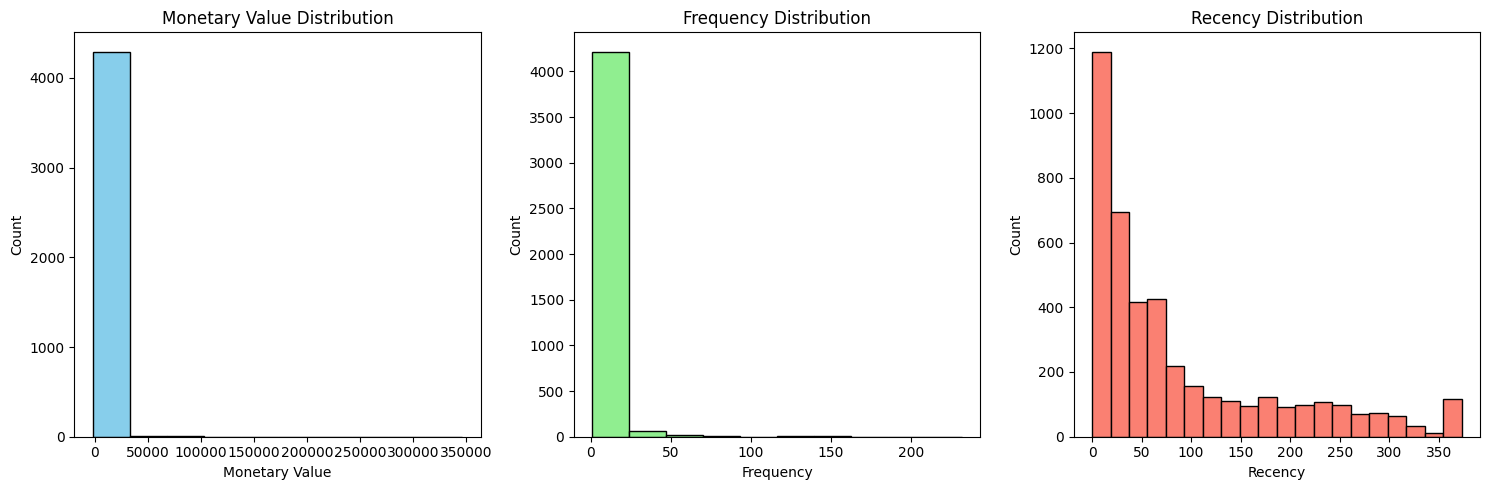

In [26]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(aggregated_df['MonetaryValue'], bins=10, color='skyblue', edgecolor='black')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(aggregated_df['Frequency'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
plt.hist(aggregated_df['Recency'], bins=20, color='salmon', edgecolor='black')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

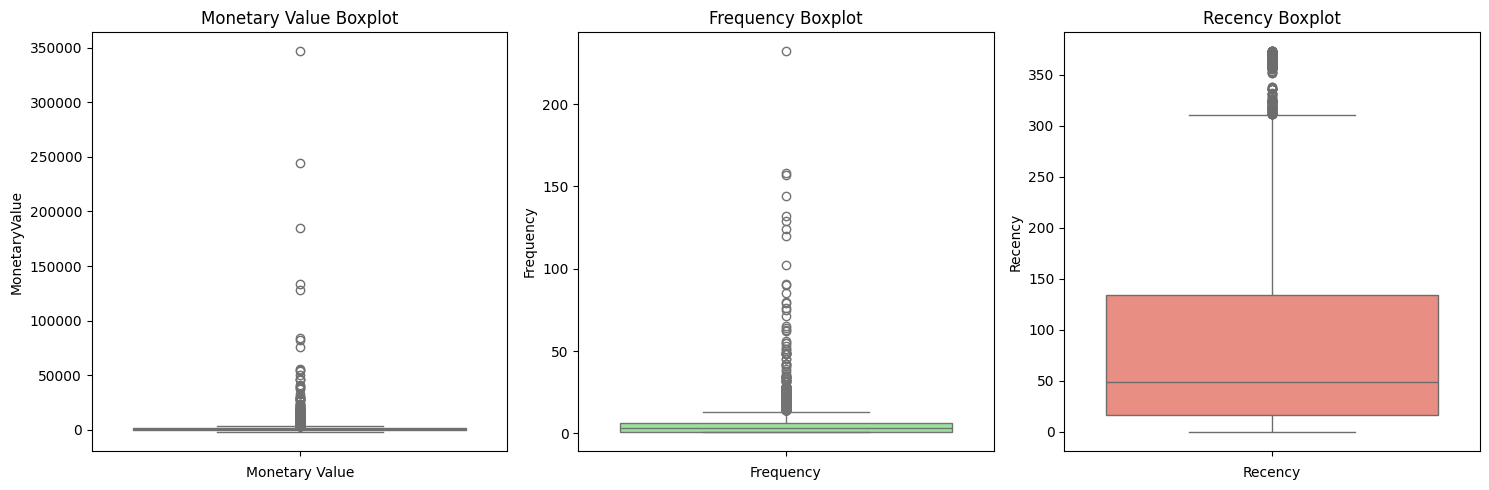

In [27]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=aggregated_df['MonetaryValue'], color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(data=aggregated_df['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=aggregated_df['Recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

In [28]:
# Calculate the first quartile (25th percentile) of the 'MonetaryValue' column
M_Q1 = aggregated_df["MonetaryValue"].quantile(0.25)

# Calculate the third quartile (75th percentile) of the 'MonetaryValue' column
M_Q3 = aggregated_df["MonetaryValue"].quantile(0.75)

# Calculate the Interquartile Range (IQR) for 'MonetaryValue'
M_IQR = M_Q3 - M_Q1

# Identify outliers in the 'MonetaryValue' column
# Outliers are defined as values that are either below Q1 - 1.5*IQR or above Q3 + 1.5*IQR
monetary_outliers_df = aggregated_df[
    (aggregated_df["MonetaryValue"] > (M_Q3 + 1.5 * M_IQR)) | 
    (aggregated_df["MonetaryValue"] < (M_Q1 - 1.5 * M_IQR))
].copy()

# Generate descriptive statistics for the DataFrame containing the outliers
monetary_outliers_df.describe()


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,421.00,421.00,421.00,421,421.00
mean,15093.43,11860.72,20.98,2010-11-12 02:25:58.004750592,27.46
min,12357.00,3731.97,1.00,2010-01-17 11:33:00,0.00
25%,13599.00,4454.95,9.00,2010-11-11 19:54:00,3.00
50%,14952.00,6077.67,15.00,2010-11-28 15:47:00,11.00
75%,16670.00,9791.81,23.00,2010-12-06 13:34:00,28.00
max,18260.00,346585.95,232.00,2010-12-09 19:32:00,326.00
std,1731.86,25402.60,23.72,NaN,48.73


In [29]:
F_Q1 = aggregated_df['Frequency'].quantile(0.25)
F_Q3 = aggregated_df['Frequency'].quantile(0.75)
F_IQR = F_Q3 - F_Q1

frequency_outliers_df = aggregated_df[(aggregated_df['Frequency'] > (F_Q3 + 1.5 * F_IQR)) | (aggregated_df['Frequency'] < (F_Q1 - 1.5 * F_IQR))].copy()

frequency_outliers_df.describe()# Calculate the first quartile (25th percentile) of the 'Frequency' column
F_Q1 = aggregated_df['Frequency'].quantile(0.25)

# Calculate the third quartile (75th percentile) of the 'Frequency' column
F_Q3 = aggregated_df['Frequency'].quantile(0.75)

# Calculate the Interquartile Range (IQR) for 'Frequency'
F_IQR = F_Q3 - F_Q1

# Identify outliers in the 'Frequency' column
# Outliers are defined as values that are either below Q1 - 1.5*IQR or above Q3 + 1.5*IQR
frequency_outliers_df = aggregated_df[
    (aggregated_df['Frequency'] > (F_Q3 + 1.5 * F_IQR)) | 
    (aggregated_df['Frequency'] < (F_Q1 - 1.5 * F_IQR))
].copy()

# Generate descriptive statistics for the DataFrame containing the outliers
frequency_outliers_df.describe()


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,323.00,323.00,323.00,323,323.00
mean,15291.50,12547.90,27.02,2010-11-23 14:43:20.619194880,15.95
min,12417.00,799.53,14.00,2010-05-12 16:51:00,0.00
25%,13787.50,3729.13,15.00,2010-11-21 12:45:30,2.00
50%,15270.00,5572.75,19.00,2010-12-02 10:39:00,7.00
75%,16740.50,10288.00,27.00,2010-12-07 13:05:00,18.00
max,18260.00,346585.95,232.00,2010-12-09 19:32:00,211.00
std,1723.28,28872.56,24.80,NaN,26.00


In [30]:
non_outliers_df = aggregated_df[(~aggregated_df.index.isin(monetary_outliers_df.index)) & (~aggregated_df.index.isin(frequency_outliers_df.index))]

non_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,3811.00,3811.00,3811.00,3811,3811.00
mean,15384.25,844.07,3.35,2010-09-03 15:00:16.924691456,96.93
min,12346.00,-1663.06,1.00,2009-12-01 10:49:00,0.00
25%,13920.50,261.28,1.00,2010-07-08 16:27:00,21.00
50%,15402.00,557.92,2.00,2010-10-13 12:08:00,57.00
75%,16860.50,1209.03,5.00,2010-11-18 10:13:30,154.00
max,18287.00,3727.40,13.00,2010-12-09 20:01:00,373.00
std,1692.51,788.35,2.74,NaN,98.96


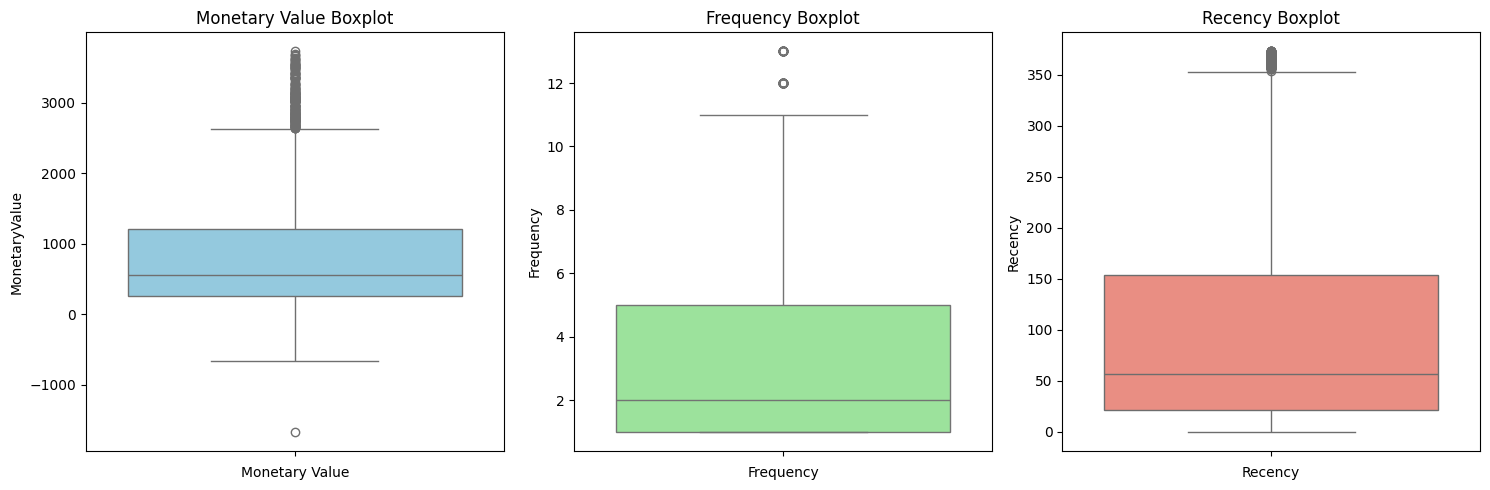

In [31]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=non_outliers_df['MonetaryValue'], color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(data=non_outliers_df['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=non_outliers_df['Recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

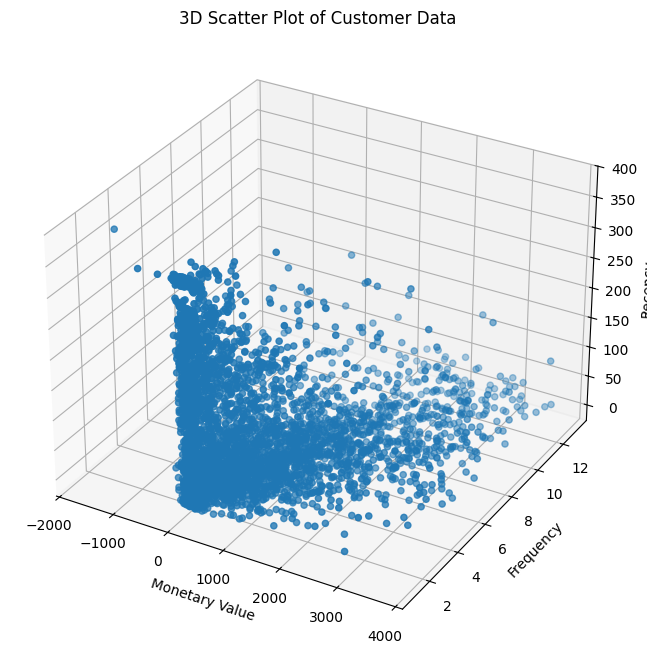

In [32]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(non_outliers_df["MonetaryValue"], non_outliers_df["Frequency"], non_outliers_df["Recency"])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

Standard scaling transforms the features of your data to have a mean of 0 and a standard deviation of 1, ensuring that each feature contributes equally to the analysis.

$$
z = \frac{x - \mu}{\sigma}
$$

Where:
- $z$ is the standardized value,
- $x$ is the original value,
- $\mu$ is the mean of the feature,
- $\sigma$ is the standard deviation of the feature.

In [33]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(non_outliers_df[["MonetaryValue", "Frequency", "Recency"]])

scaled_data

array([[-0.85595626, -0.49307034,  0.67782494],
       [ 0.60799795, -0.49307034, -0.95947275],
       [-0.79024095, -0.85858115, -0.24189166],
       ...,
       [-0.59253685, -0.85858115,  2.00181257],
       [ 0.37344   , -0.12755953,  0.14216582],
       [ 1.83513604,  0.60346209, -0.80787111]])

In [34]:
scaled_data_df = pd.DataFrame(scaled_data, index=non_outliers_df.index, columns=("MonetaryValue", "Frequency", "Recency"))

scaled_data_df

,MonetaryValue,Frequency,Recency
0,-0.86,-0.49,0.68
1,0.61,-0.49,-0.96
2,-0.79,-0.86,-0.24
3,1.72,-0.13,-0.56
4,-0.69,-0.86,-0.88
...,...,...,...
4309,-0.26,0.97,-0.81
4310,-0.55,-0.86,-0.31
4311,-0.59,-0.86,2.00
4312,0.37,-0.13,0.14


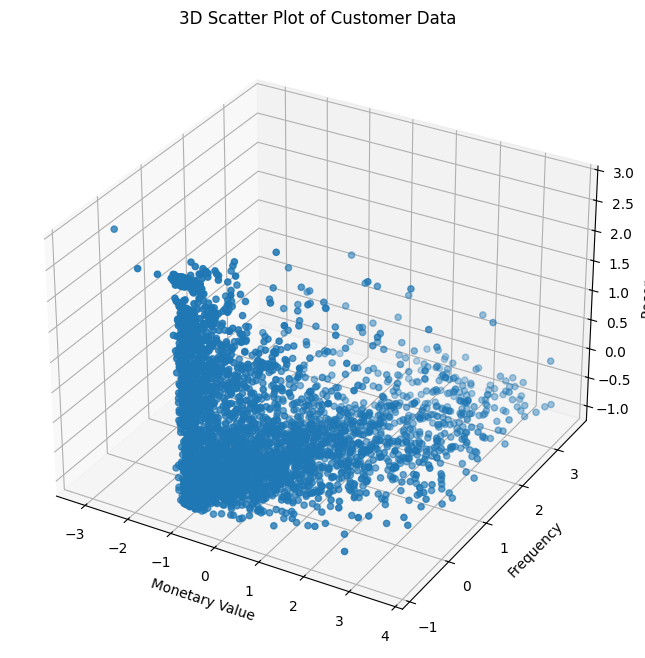

In [35]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(scaled_data_df["MonetaryValue"], scaled_data_df["Frequency"], scaled_data_df["Recency"])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

## KMeans Clustering

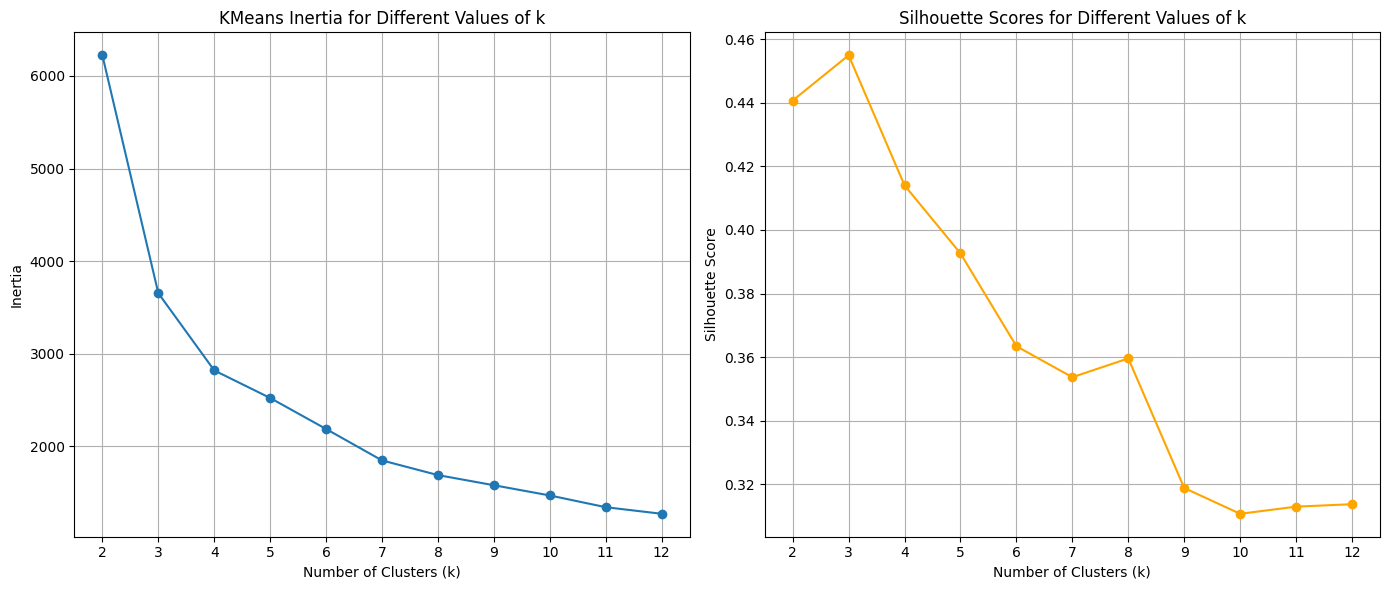

In [36]:
max_k = 12

inertia = []
silhoutte_scores = []
k_values = range(2, max_k + 1)

for k in k_values:

    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)

    cluster_labels = kmeans.fit_predict(scaled_data_df)

    sil_score = silhouette_score(scaled_data_df, cluster_labels)

    silhoutte_scores.append(sil_score)

    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, silhoutte_scores, marker='o', color='orange')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

### Silhouette Score

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

Where:
- $s(i)$ is the silhouette score for a single sample $i$
- $a(i)$ is the average distance between $i$ and all other points in the same cluster,
- $b(i)$ is the minimum average distance between $i$ and all points in the nearest cluster to which $i$ does not belong.

The silhoutte score ranges between $[-1, 1]$, a higher value indicates more distinct clusters.

In [37]:
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000)

cluster_labels = kmeans.fit_predict(scaled_data_df)

cluster_labels

array([0, 1, 2, ..., 0, 1, 1], dtype=int32)

In [38]:
non_outliers_df["Cluster"] = cluster_labels

non_outliers_df

/tmp/ipykernel_37841/3577770544.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df["Cluster"] = cluster_labels


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.00,169.36,2,2010-06-28 13:53:00,164,0
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,1
2,12348.00,221.16,1,2010-09-27 14:59:00,73,2
3,12349.00,2196.99,3,2010-10-28 08:23:00,42,1
4,12351.00,300.93,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4309,18283.00,641.77,6,2010-11-22 15:30:00,17,1
4310,18284.00,411.68,1,2010-10-04 11:33:00,66,2
4311,18285.00,377.00,1,2010-02-17 10:24:00,295,0
4312,18286.00,1138.43,3,2010-08-20 11:57:00,111,1


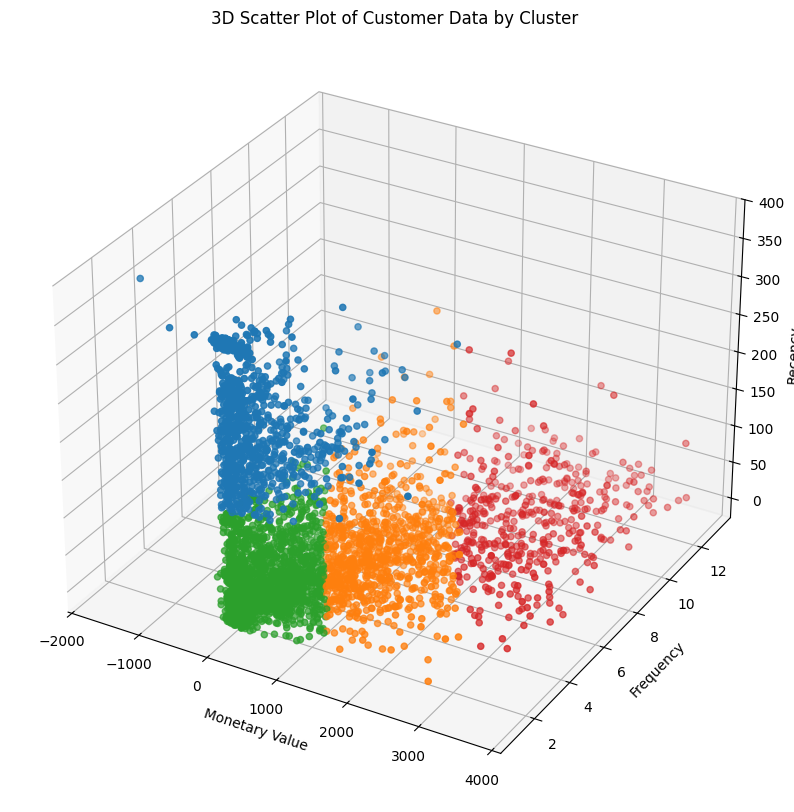

In [39]:
cluster_colors = {0: '#1f77b4',  # Blue
                  1: '#ff7f0e',  # Orange
                  2: '#2ca02c',  # Green
                  3: '#d62728'}  # Red

colors = non_outliers_df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(non_outliers_df['MonetaryValue'], 
                     non_outliers_df['Frequency'], 
                     non_outliers_df['Recency'], 
                     c=colors,  # Use mapped solid colors
                     marker='o')

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data by Cluster')

plt.show()

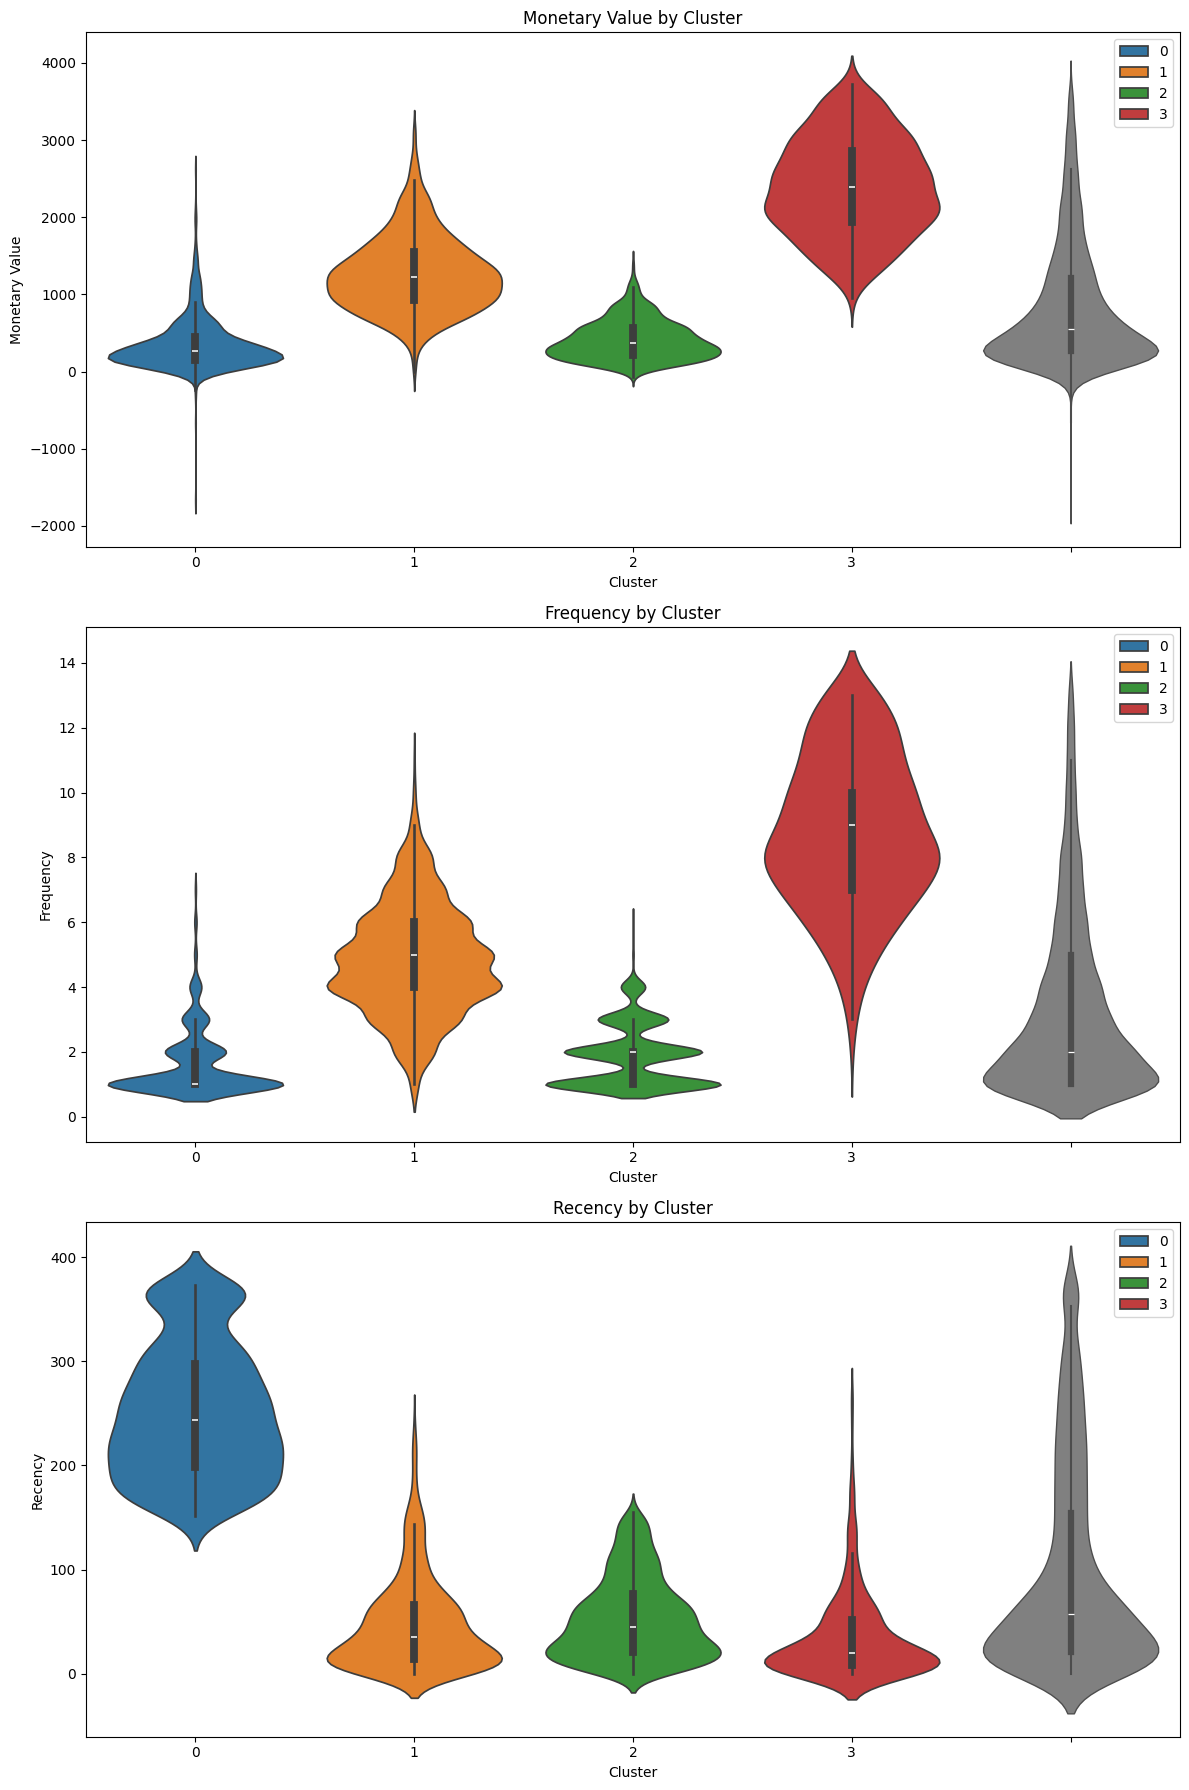

In [40]:
plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['MonetaryValue'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Frequency'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')


plt.subplot(3, 1, 3)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Recency'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

1. Cluster 0 (Blue): "Retain"
* Rationale: This cluster represents high-value customers who purchase regularly, though not always very recently. The focus should be on retention efforts to maintain their loyalty and spending levels.
* Action: Implement loyalty programs, personalized offers, and regular engagement to ensure they remain active.

2. Cluster 1 (Orange): "Re-Engage"
* Rationale: This group includes lower-value, infrequent buyers who haven’t purchased recently. The focus should be on re-engagement to bring them back into active purchasing behavior.
* Action: Use targeted marketing campaigns, special discounts, or reminders to encourage them to return and purchase again.

3. Cluster 2 (Green): "Nurture"
* Rationale: This cluster represents the least active and lowest-value customers, but they have made recent purchases. These customers may be new or need nurturing to increase their engagement and spending.
* Action: Focus on building relationships, providing excellent customer service, and offering incentives to encourage more frequent purchases.

4. Cluster 3 (Red): "Reward"
* Rationale: This cluster includes high-value, very frequent buyers, many of whom are still actively purchasing. They are your most loyal customers, and rewarding their loyalty is key to maintaining their engagement.
* Action: Implement a robust loyalty program, provide exclusive offers, and recognize their loyalty to keep them engaged and satisfied.

**Summary of Cluster Names:**

* Cluster 0 (Blue): "Retain"
* Cluster 1 (Orange): "Re-Engage"
* Cluster 2 (Green): "Nurture"
* Cluster 3 (Red): "Reward"

In [41]:
overlap_indices = monetary_outliers_df.index.intersection(frequency_outliers_df.index)

monetary_only_outliers = monetary_outliers_df.drop(overlap_indices)
frequency_only_outliers = frequency_outliers_df.drop(overlap_indices)
monetary_and_frequency_outliers = monetary_outliers_df.loc[overlap_indices]

monetary_only_outliers["Cluster"] = -1
frequency_only_outliers["Cluster"] = -2
monetary_and_frequency_outliers["Cluster"] = -3

outlier_clusters_df = pd.concat([monetary_only_outliers, frequency_only_outliers, monetary_and_frequency_outliers])

outlier_clusters_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
9,12357.00,11229.99,1,2010-11-16 10:05:00,23,-1
25,12380.00,4747.44,5,2010-11-23 12:06:00,16,-1
42,12409.00,12033.54,6,2010-10-15 10:24:00,55,-1
48,12415.00,19468.84,4,2010-11-29 15:07:00,10,-1
62,12433.00,7205.39,5,2010-12-08 16:49:00,1,-1
...,...,...,...,...,...,...
4264,18223.00,7186.60,25,2010-11-19 14:57:00,20,-3
4265,18225.00,7289.89,19,2010-12-09 15:46:00,0,-3
4266,18226.00,6557.48,24,2010-11-26 15:51:00,13,-3
4270,18231.00,4776.10,24,2010-10-29 14:17:00,41,-3


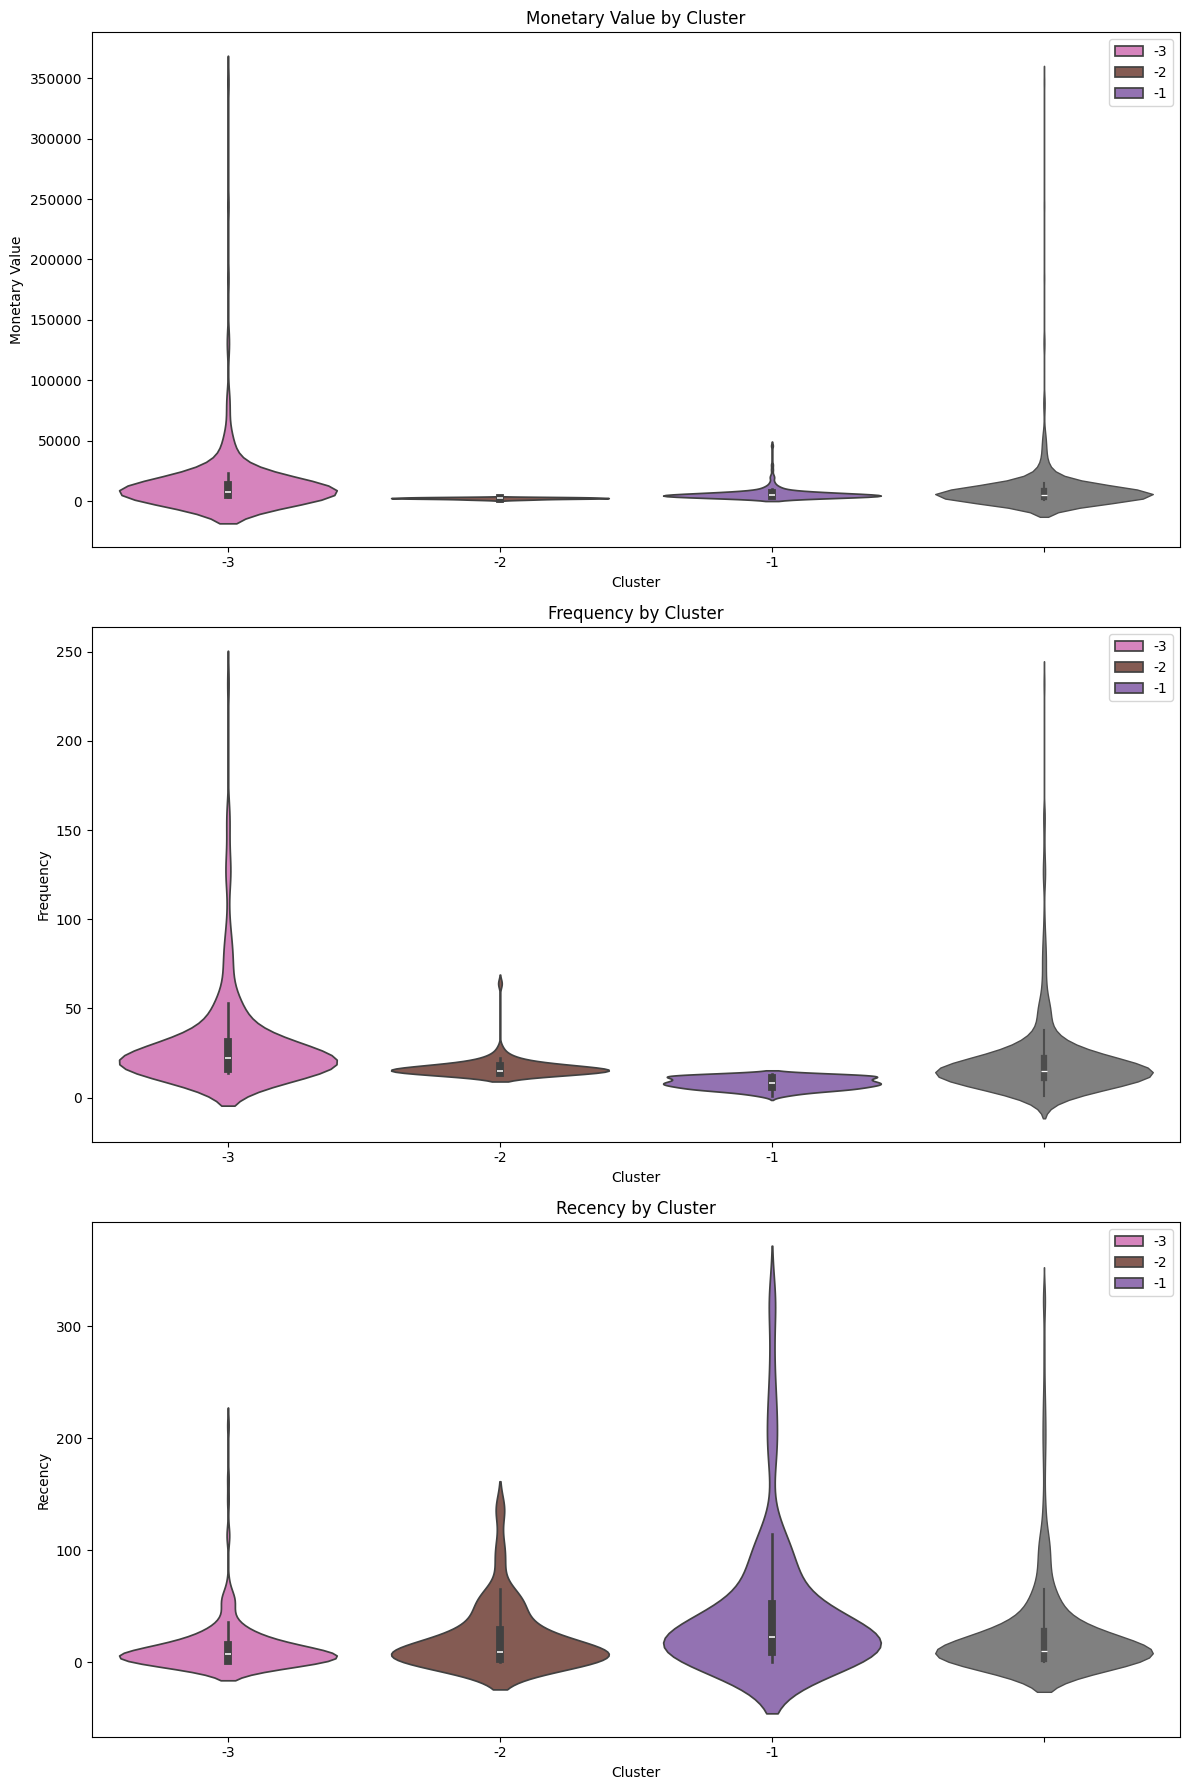

In [42]:
cluster_colors = {-1: '#9467bd',
                  -2: '#8c564b',
                  -3: '#e377c2'}

plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['MonetaryValue'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Frequency'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Recency'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

* Cluster -1 (Monetary Outliers) PAMPER:
Characteristics: High spenders but not necessarily frequent buyers. Their purchases are large but infrequent.
Potential Strategy: Focus on maintaining their loyalty with personalized offers or luxury services that cater to their high spending capacity.

* Cluster -2 (Frequency Outliers) UPSELL:
Characteristics: Frequent buyers who spend less per purchase. These customers are consistently engaged but might benefit from upselling opportunities.
Potential Strategy: Implement loyalty programs or bundle deals to encourage higher spending per visit, given their frequent engagement.

* Cluster -3 (Monetary & Frequency Outliers) DELIGHT:
Characteristics: The most valuable outliers, with extreme spending and frequent purchases. They are likely your top-tier customers who require special attention.
Potential Strategy: Develop VIP programs or exclusive offers to maintain their loyalty and encourage continued engagement.

In [43]:
cluster_labels = {
    0: "RETAIN",
    1: "RE-ENGAGE",
    2: "NURTURE",
    3: "REWARD",
    -1: "PAMPER",
    -2: "UPSELL",
    -3: "DELIGHT"
}

In [44]:
full_clustering_df = pd.concat([non_outliers_df, outlier_clusters_df])

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.00,169.36,2,2010-06-28 13:53:00,164,0
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,1
2,12348.00,221.16,1,2010-09-27 14:59:00,73,2
3,12349.00,2196.99,3,2010-10-28 08:23:00,42,1
4,12351.00,300.93,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4264,18223.00,7186.60,25,2010-11-19 14:57:00,20,-3
4265,18225.00,7289.89,19,2010-12-09 15:46:00,0,-3
4266,18226.00,6557.48,24,2010-11-26 15:51:00,13,-3
4270,18231.00,4776.10,24,2010-10-29 14:17:00,41,-3


In [45]:
full_clustering_df["ClusterLabel"] = full_clustering_df["Cluster"].map(cluster_labels)

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster,ClusterLabel
0,12346.00,169.36,2,2010-06-28 13:53:00,164,0,RETAIN
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,1,RE-ENGAGE
2,12348.00,221.16,1,2010-09-27 14:59:00,73,2,NURTURE
3,12349.00,2196.99,3,2010-10-28 08:23:00,42,1,RE-ENGAGE
4,12351.00,300.93,1,2010-11-29 15:23:00,10,2,NURTURE
...,...,...,...,...,...,...,...
4264,18223.00,7186.60,25,2010-11-19 14:57:00,20,-3,DELIGHT
4265,18225.00,7289.89,19,2010-12-09 15:46:00,0,-3,DELIGHT
4266,18226.00,6557.48,24,2010-11-26 15:51:00,13,-3,DELIGHT
4270,18231.00,4776.10,24,2010-10-29 14:17:00,41,-3,DELIGHT


## Visualisation

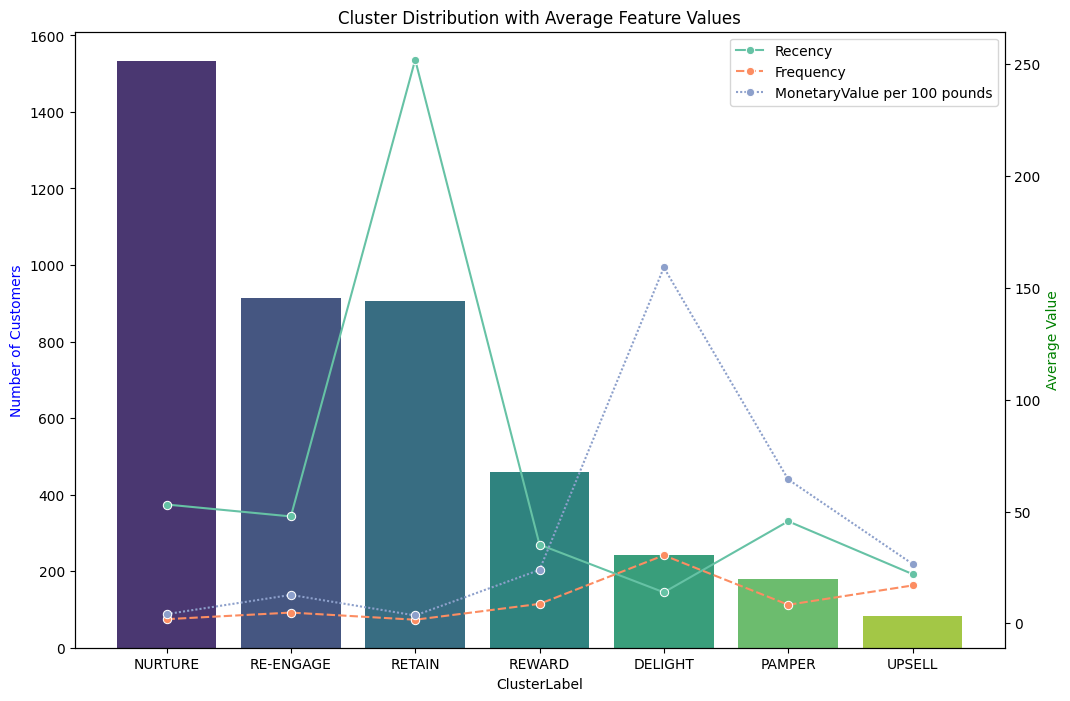

In [46]:
cluster_counts = full_clustering_df['ClusterLabel'].value_counts()
full_clustering_df["MonetaryValue per 100 pounds"] = full_clustering_df["MonetaryValue"] / 100.00
feature_means = full_clustering_df.groupby('ClusterLabel')[['Recency', 'Frequency', 'MonetaryValue per 100 pounds']].mean()

fig, ax1 = plt.subplots(figsize=(12, 8))

sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis', hue=cluster_counts.index)
ax1.set_ylabel('Number of Customers', color='b')
ax1.set_title('Cluster Distribution with Average Feature Values')

ax2 = ax1.twinx()

sns.lineplot(data=feature_means, ax=ax2, palette='Set2', marker='o')
ax2.set_ylabel('Average Value', color='g')

plt.show()